In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-banknote-authentication/data_banknote_authentication.txt


In [2]:
import pandas as pd # Data Processing / Wrangling 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('/kaggle/input/data-banknote-authentication/data_banknote_authentication.txt', header=None) 
data.columns = ['var', 'skew', 'curt', 'entr', 'auth'] 
print(data.head())

       var    skew    curt     entr  auth
0  3.62160  8.6661 -2.8073 -0.44699     0
1  4.54590  8.1674 -2.4586 -1.46210     0
2  3.86600 -2.6383  1.9242  0.10645     0
3  3.45660  9.5228 -4.0112 -3.59440     0
4  0.32924 -4.4552  4.5718 -0.98880     0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var     1372 non-null   float64
 1   skew    1372 non-null   float64
 2   curt    1372 non-null   float64
 3   entr    1372 non-null   float64
 4   auth    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data.describe()

,var,skew,curt,entr,auth
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

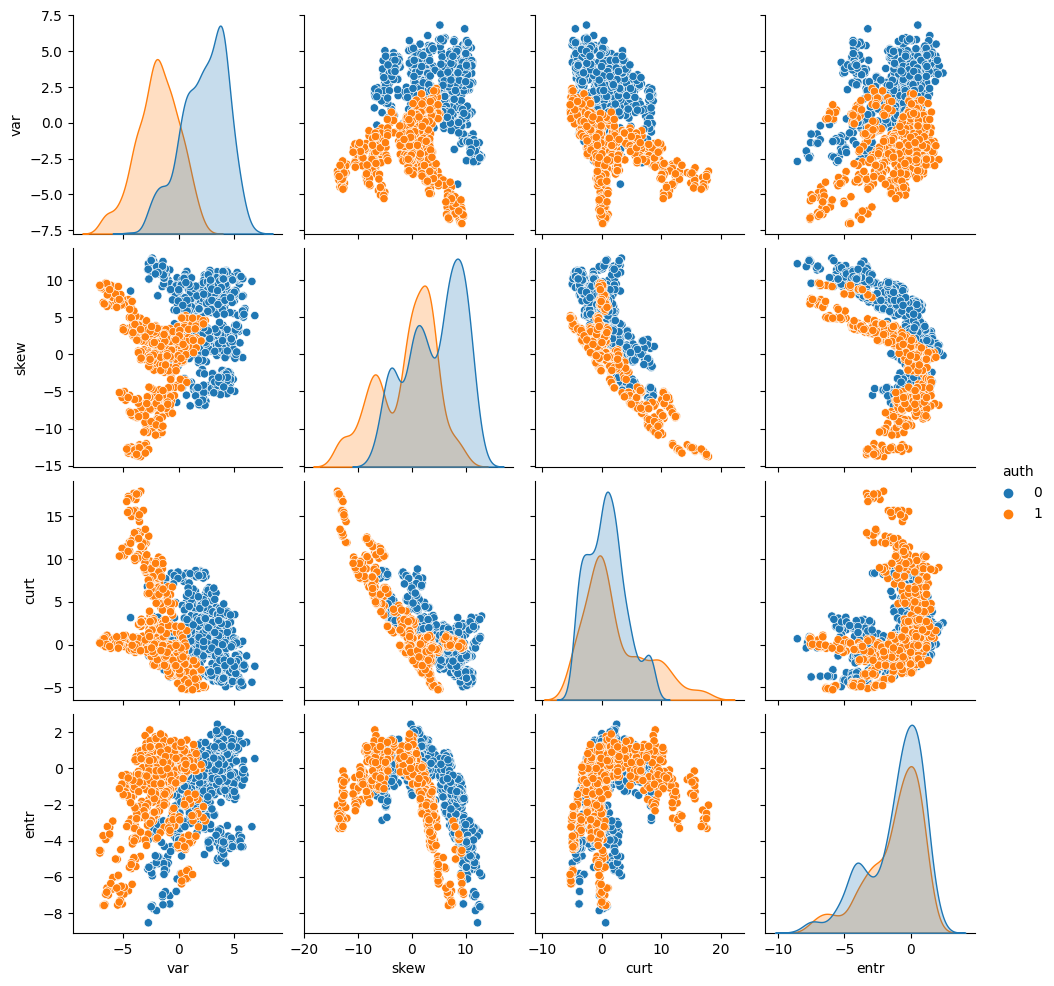

In [6]:
sns.pairplot(data, hue='auth') 
plt.show()

<Figure size 800x600 with 0 Axes>

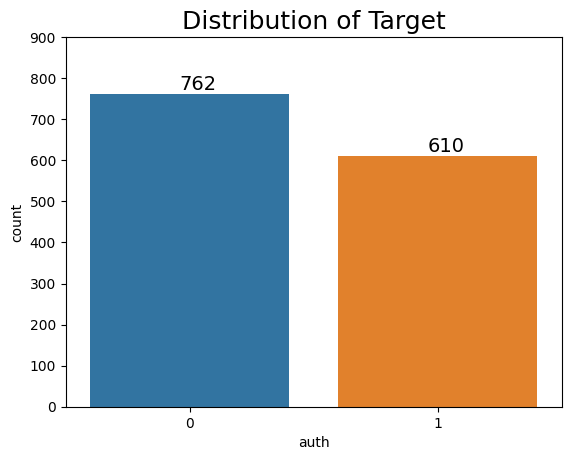

In [7]:
plt.figure(figsize=(8,6)) 
fig, ax = plt.subplots() 
plt.title('Distribution of Target', size=18) 
sns.countplot(x=data['auth']) 
target_count = data.auth.value_counts() 
ax.annotate(target_count[0], xy=(-0.04,10+target_count[0]), size=14) 
ax.annotate(target_count[1], xy=(0.96,10+target_count[1]), size=14) 
plt.ylim(0,900) 
plt.show()

In [8]:
import imblearn # import library 
from imblearn.under_sampling import RandomUnderSampler 
x = data.drop('auth', axis =1) 
y=data['auth'] 
target_count = data.auth.value_counts() 
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable 
x_rus, y_rus = rus.fit_resample(x, y) 
modified_count = y_rus.value_counts() 
print('original dataset shape:',target_count[0],target_count[1] ) 
print('Resample dataset shape', modified_count[0],modified_count[1])

original dataset shape: 762 610
Resample dataset shape 610 610


# #Assignment 2-- Instead of RandomUnderSampler use different
https://imbalanced-learn.org/stable/references/ensemble.html


In [9]:
# import library 
import imblearn 
from imblearn.over_sampling import RandomOverSampler 
x = data.drop('auth', axis =1) 
y=data['auth'] 
target_count = data.auth.value_counts() 
ros = RandomOverSampler(random_state=42) 
x_rus, y_rus = ros.fit_resample(x, y) 
modified_count = y_rus.value_counts() 
print('original dataset shape:',target_count[0],target_count[1] ) 
print('Resample dataset shape', modified_count[0],modified_count[1])

original dataset shape: 762 610
Resample dataset shape 762 762


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus , test_size=0.3, random_state=42)

In [11]:
scalar = StandardScaler() 
scalar.fit(x_train) 
x_train = scalar.transform(x_train) 
x_test = scalar.transform(x_test)

In [12]:
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto') 
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [13]:
y_pred = np.array(clf.predict(x_test)) 
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["Pred.Negative", "Pred.Positive"], index=['Act.Negative', "Act.Positive"]) 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4) 
print(conf_mat) 
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            207              4
Act.Positive              2            245

 Accuracy = 98.69%


In [14]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2) 
new_banknote = scalar.transform(new_banknote) 
print(f'Prediction: Class{clf.predict(new_banknote)[0]}') 
print(f'Probability [0/1]: {clf.predict_proba(new_banknote)[0]}')



Prediction: Class0
Probability [0/1]: [0.67035992 0.32964008]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
from sklearn import metrics

<Axes: >

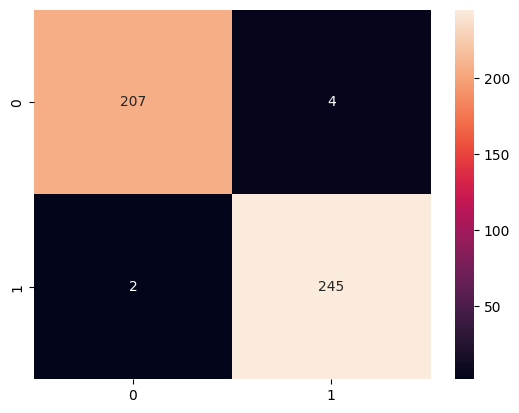

In [16]:
import seaborn as sns 
cf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(cf_matrix, annot=True,fmt='')

In [17]:
from sklearn.metrics import classification_report 
target_names = ['NotFake', 'Fake'] 
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     NotFake       0.99      0.98      0.99       211
        Fake       0.98      0.99      0.99       247

    accuracy                           0.99       458
   macro avg       0.99      0.99      0.99       458
weighted avg       0.99      0.99      0.99       458



In [18]:
from sklearn.metrics import roc_auc_score 
score = roc_auc_score(y_test, y_pred) 
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.9865


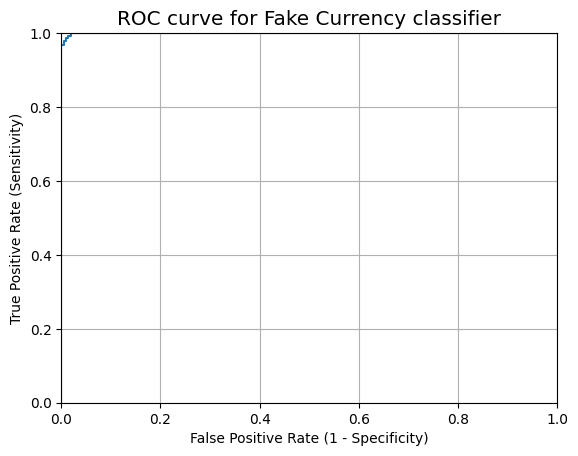

In [19]:
y_pred_prob = clf.predict_proba(x_test)[:,1] 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.rcParams['font.size'] = 12 
plt.title('ROC curve for Fake Currency classifier') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.grid(True)

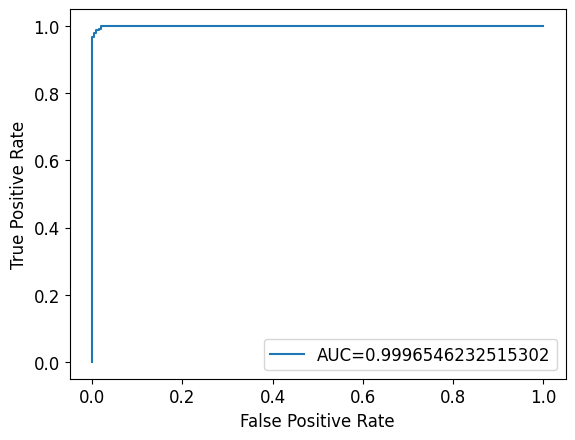

In [20]:
y_pred_prob = clf.predict_proba(x_test)[:,1] 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob) 
auc = metrics.roc_auc_score(y_test, y_pred_prob) #create ROC curve 
plt.plot(fpr,tpr,label="AUC="+str(auc)) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [21]:
import scikitplot as skplt 
print("Scikit Plot Version : ", skplt.__version__)

Scikit Plot Version :  0.3.7


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


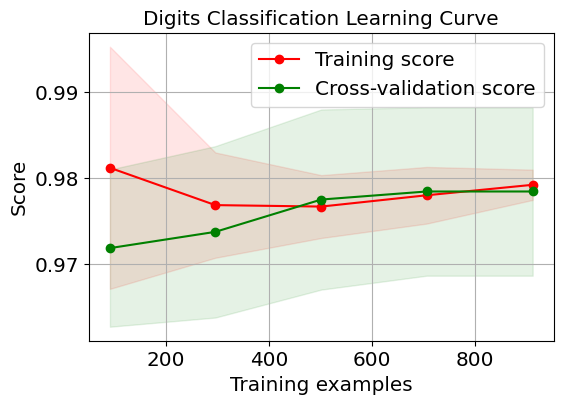

In [22]:
skplt.estimators.plot_learning_curve(clf, x_train, y_train,
                                     cv=7, shuffle=True, scoring="accuracy", n_jobs=-1, 
                                     figsize=(6,4), title_fontsize="large", 
                                     text_fontsize="large", title="Digits Classification Learning Curve");

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

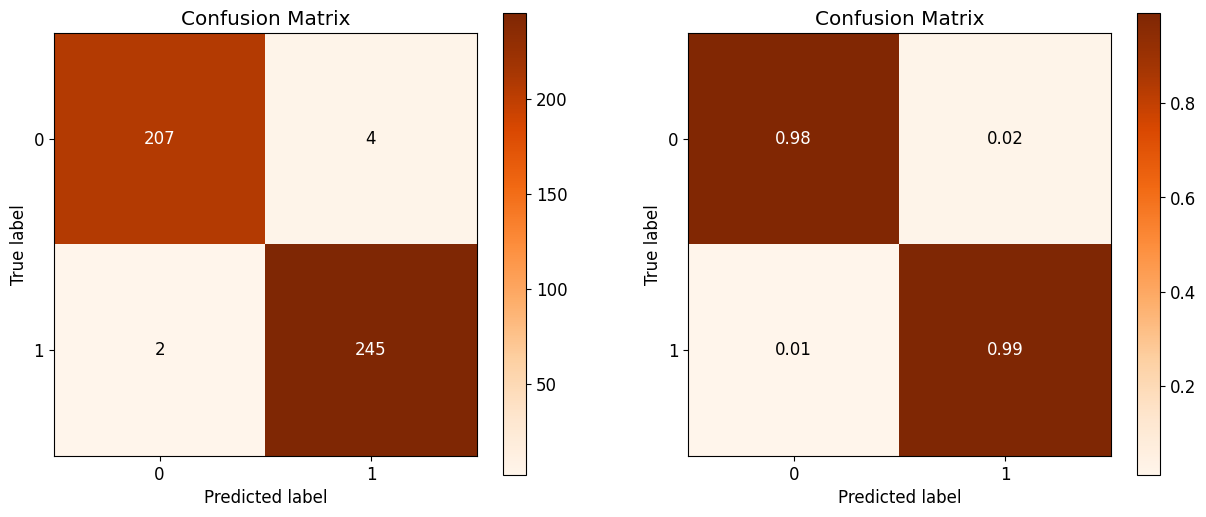

In [23]:
Y_pred = clf.predict(x_test) 
fig = plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(121) 
skplt.metrics.plot_confusion_matrix(y_test, Y_pred, 
                                    title="Confusion Matrix", cmap="Oranges", 
                                    ax=ax1) 
ax2 = fig.add_subplot(122) 
skplt.metrics.plot_confusion_matrix(y_test, Y_pred, normalize=True, 
                                    title="Confusion Matrix",cmap="Oranges", 
                                    ax=ax2)

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
rf_reg = RandomForestClassifier() 
rf_reg.fit(x_train, y_train) 
rf_reg.score(x_test, y_test)

0.9956331877729258

In [25]:
gb_classif = GradientBoostingClassifier() 
gb_classif.fit(x_train, y_train) 
gb_classif.score(x_test, y_test)

0.9978165938864629

<Axes: title={'center': 'Feature Importance'}>

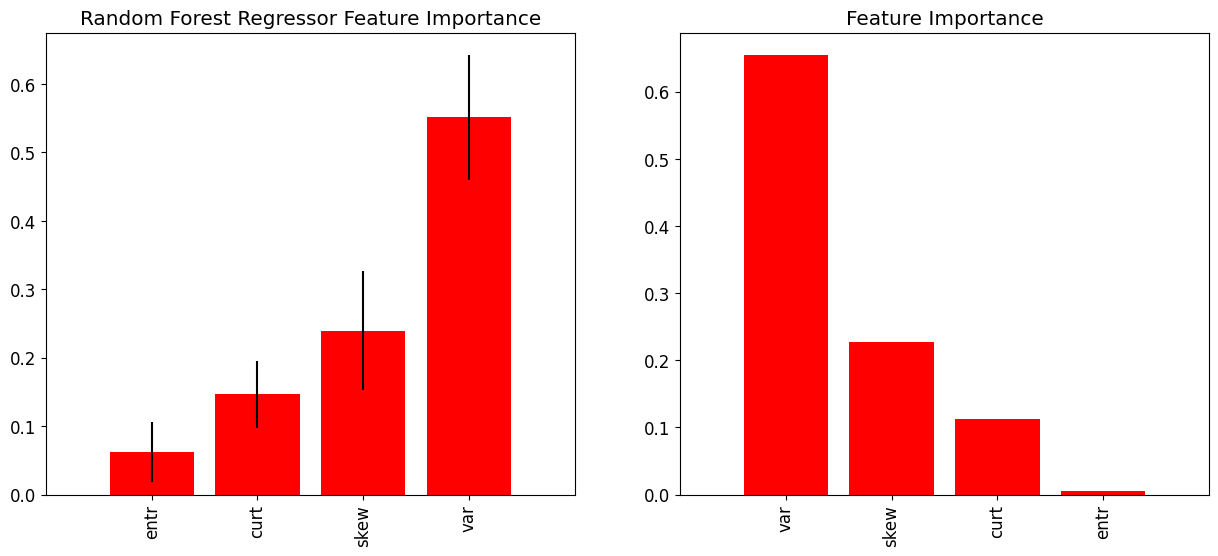

In [26]:
fig = plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(121) 
features = ['var', 'skew', 'curt', 'entr'] 
skplt.estimators.plot_feature_importances(rf_reg, feature_names=features, 
                                          title="Random Forest Regressor Feature Importance", 
                                          x_tick_rotation=90, order="ascending", ax=ax1); 
ax2 = fig.add_subplot(122) 
skplt.estimators.plot_feature_importances(gb_classif, feature_names=features,x_tick_rotation=90,order='descending',ax=ax2)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


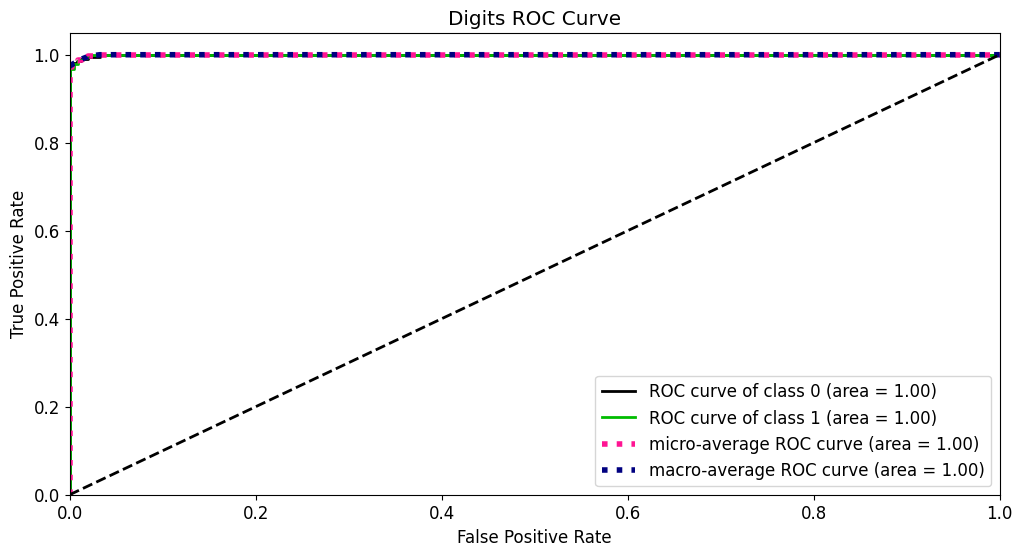

In [27]:
Y_test_probs = clf.predict_proba(x_test) 
skplt.metrics.plot_roc_curve(y_test, Y_test_probs, 
                             title="Digits ROC Curve", figsize=(12,6));

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


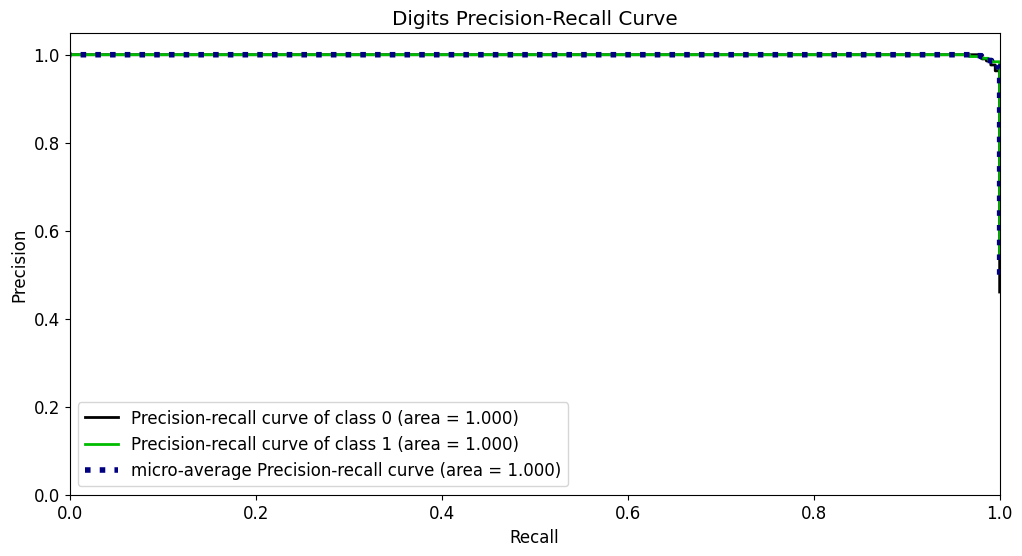

In [28]:
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs, 
                                          title="Digits Precision-Recall Curve", figsize=(12,6));

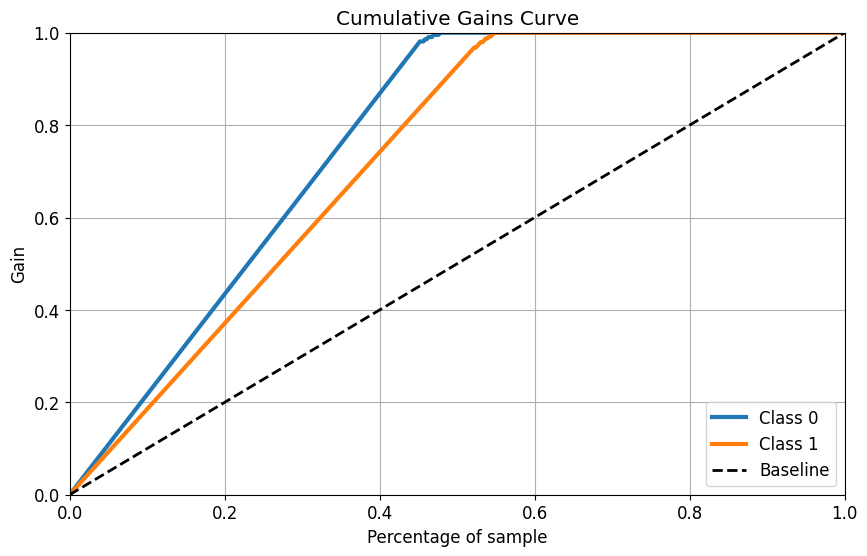

In [29]:
skplt.metrics.plot_cumulative_gain(y_test, Y_test_probs, figsize=(10,6));

# Other algorithms


* *KNN*

In [30]:
method_names = [] 
method_scores = []

Score for Number of Neighbors = 3: 1.0


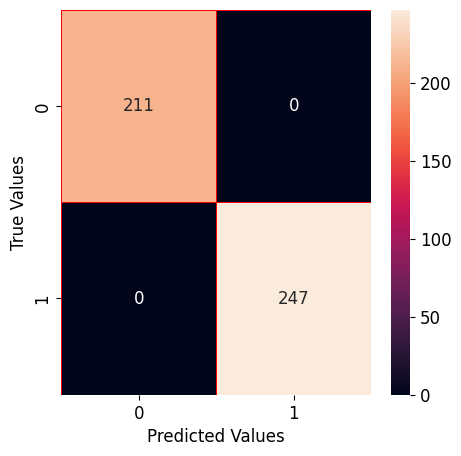

In [31]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train,y_train) 
print("Score for Number of Neighbors = 3: {}".format(knn.score(x_test,y_test))) 
method_names.append("KNN") 
method_scores.append(knn.score(x_test,y_test)) #Confusion Matrix 
y_pred = knn.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

SVM Classification Score is: 1.0


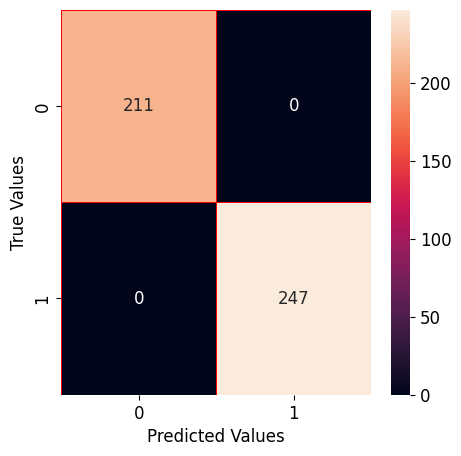

In [32]:
from sklearn.svm import SVC 
svm = SVC(random_state=42) 
svm.fit(x_train,y_train) 
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test))) 
method_names.append("SVM") 
method_scores.append(svm.score(x_test,y_test)) #Confusion Matrix 
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

SVM Classification Score is: 1.0


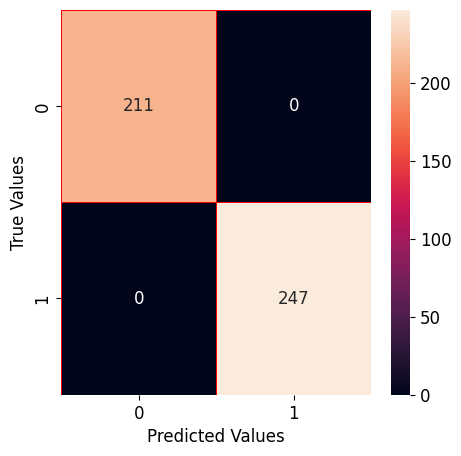

In [33]:
from sklearn.svm import SVC 
svm = SVC(random_state=42) 
svm.fit(x_train,y_train) 
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test))) 
method_names.append("SVM") 
method_scores.append(svm.score(x_test,y_test)) #Confusion Matrix 
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

Naive Bayes Classification Score: 0.8427947598253275


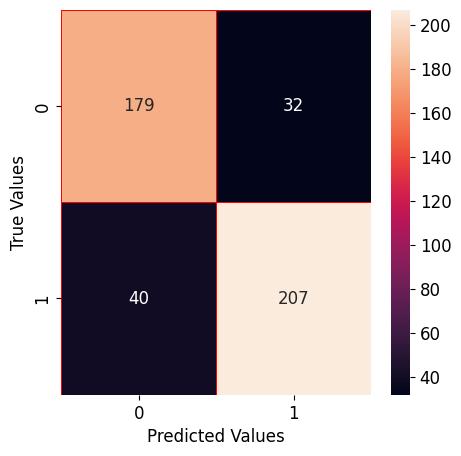

In [34]:
from sklearn.naive_bayes import GaussianNB 
naive_bayes = GaussianNB() 
naive_bayes.fit(x_test,y_test) 
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test))) 
method_names.append("Naive Bayes") 
method_scores.append(naive_bayes.score(x_test,y_test)) #Confusion Matrix 
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

Decision Tree Classification Score:  0.9868995633187773


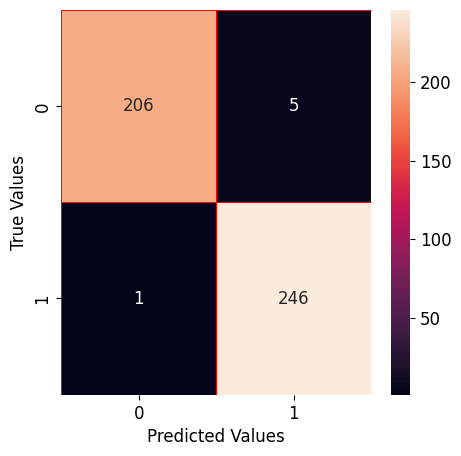

In [35]:
from sklearn.tree import DecisionTreeClassifier 
dec_tree = DecisionTreeClassifier() 
dec_tree.fit(x_train,y_train) 
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test)) 
method_names.append("Decision Tree") 
method_scores.append(dec_tree.score(x_test,y_test)) #Confusion Matrix 
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

Random Forest Classification Score:  0.9956331877729258


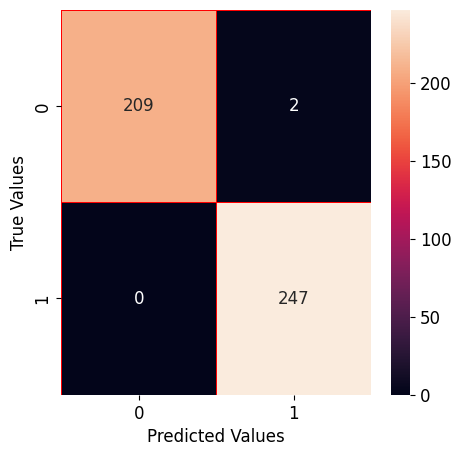

In [36]:
from sklearn.ensemble import RandomForestClassifier 
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42) 
rand_forest.fit(x_train,y_train) 
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test)) 
method_names.append("Random Forest") 
method_scores.append(rand_forest.score(x_test,y_test)) #Confusion Matrix 
y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

Gradient Forest Classification Score:  0.9978165938864629


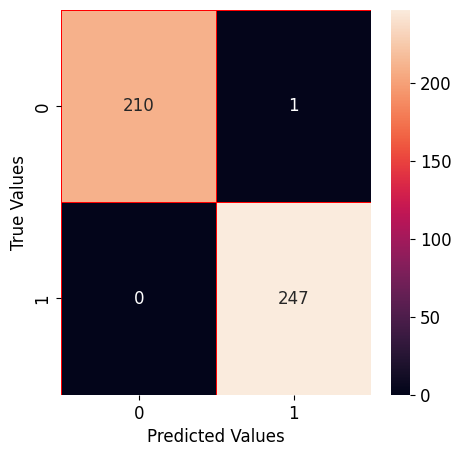

In [37]:
from sklearn.ensemble import GradientBoostingClassifier # Define Gradient Boosting Classifier with hyperparameters 
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 ) # Fit train data to GBC 
gbc.fit(x_train,y_train) 
print("Gradient Forest Classification Score: ",gbc.score(x_test,y_test)) 
method_names.append("Gradient Forest") 
method_scores.append(gbc.score(x_test,y_test)) #Confusion Matrix 
y_pred = gbc.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

Ada Boost Classification Score:  1.0


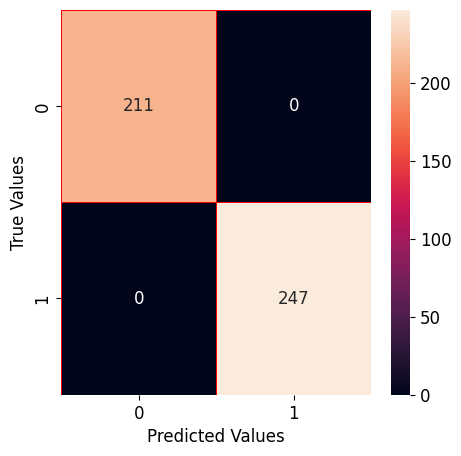

In [38]:
from sklearn.ensemble import AdaBoostClassifier 
clf = AdaBoostClassifier(n_estimators=100, random_state=0) # Fit train data to GBC 
clf.fit(x_train,y_train) 
print("Ada Boost Classification Score: ",clf.score(x_test,y_test)) 
method_names.append("Ada Boost") 
method_scores.append(clf.score(x_test,y_test)) #Confusion Matrix 
y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

XGB Boost Classification Score:  0.9956331877729258


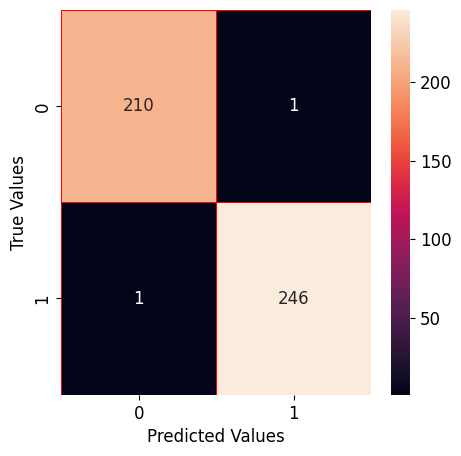

In [39]:
import xgboost as xgb 
lr = 0.01 
xgb_classifier = xgb.XGBClassifier(eta = lr) # Fit train data to GBC 
xgb_classifier.fit(x_train,y_train) 
print("XGB Boost Classification Score: ",xgb_classifier.score(x_test,y_test)) 
method_names.append("XGB Boost") 
method_scores.append(xgb_classifier.score(x_test,y_test)) #Confusion Matrix 
y_pred = xgb_classifier.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


LightGBM Classification Score:  1.0


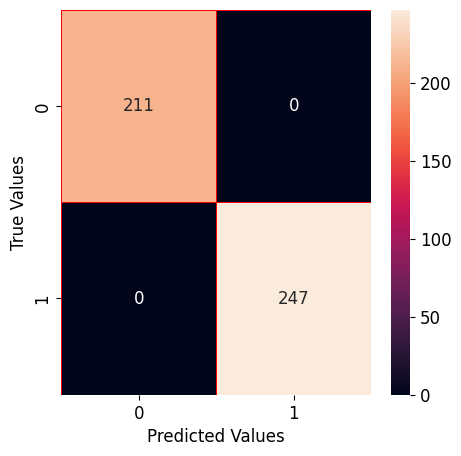

In [40]:
import lightgbm as lgb 
clf = lgb.LGBMClassifier() # Fit train data to GBC 
clf.fit(x_train,y_train) 
print("LightGBM Classification Score: ",clf.score(x_test,y_test)) 
method_names.append("LightGBM Classifier") 
method_scores.append(clf.score(x_test,y_test)) #Confusion Matrix 
y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

0:	learn: 0.6265128	total: 53.8ms	remaining: 215ms
1:	learn: 0.5672779	total: 55.1ms	remaining: 82.6ms
2:	learn: 0.5185443	total: 56ms	remaining: 37.3ms
3:	learn: 0.4774278	total: 56.9ms	remaining: 14.2ms
4:	learn: 0.4396215	total: 57.9ms	remaining: 0us
CatBoost Classification Score:  0.9737991266375546


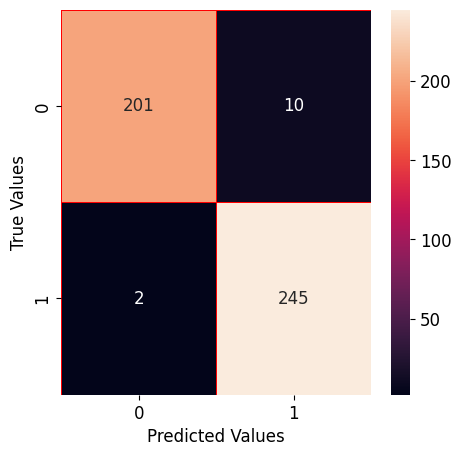

In [41]:
from catboost import CatBoostClassifier 
clf = CatBoostClassifier( iterations=5, learning_rate=0.1, loss_function='CrossEntropy' ) # Fit train data to GBC 
clf.fit(x_train,y_train) 
print("CatBoost Classification Score: ",clf.score(x_test,y_test)) 
method_names.append("CatBoost Classifier") 
method_scores.append(clf.score(x_test,y_test)) #Confusion Matrix 
y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGD Classification Score:  0.9847161572052402


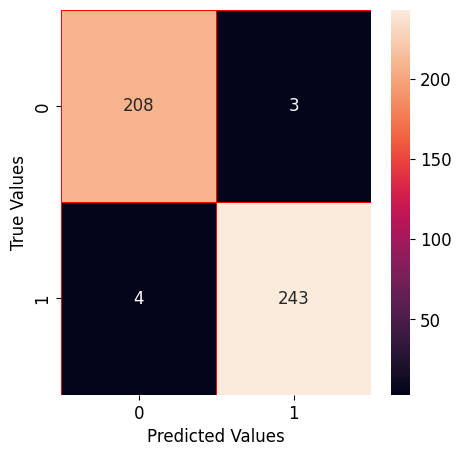

In [42]:
from sklearn.linear_model import SGDClassifier 
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) # Fit train data to GBC 
clf.fit(x_train,y_train) 
print("SGD Classification Score: ",clf.score(x_test,y_test)) 
method_names.append("SGD Classifier") 
method_scores.append(clf.score(x_test,y_test)) #Confusion Matrix 
y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix f, 
f,ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

In [43]:
combined = list(zip(method_scores, method_names)) 
sorted_combined = sorted(combined, key=lambda x: x[0],reverse=True) 
print(sorted_combined) 
sorted_list1, sorted_list2 = zip(*sorted_combined) 
print(sorted_list1) 
print(sorted_list2)

[(1.0, 'KNN'), (1.0, 'SVM'), (1.0, 'SVM'), (1.0, 'Ada Boost'), (1.0, 'LightGBM Classifier'), (0.9978165938864629, 'Gradient Forest'), (0.9956331877729258, 'Random Forest'), (0.9956331877729258, 'XGB Boost'), (0.9868995633187773, 'Decision Tree'), (0.9847161572052402, 'SGD Classifier'), (0.9737991266375546, 'CatBoost Classifier'), (0.8427947598253275, 'Naive Bayes')]
(1.0, 1.0, 1.0, 1.0, 1.0, 0.9978165938864629, 0.9956331877729258, 0.9956331877729258, 0.9868995633187773, 0.9847161572052402, 0.9737991266375546, 0.8427947598253275)
('KNN', 'SVM', 'SVM', 'Ada Boost', 'LightGBM Classifier', 'Gradient Forest', 'Random Forest', 'XGB Boost', 'Decision Tree', 'SGD Classifier', 'CatBoost Classifier', 'Naive Bayes')


In [44]:
max_scores = [] 
max_methods = [] 
for i,v in enumerate(sorted_list1): 
    if i <=5: 
        max_methods.append(sorted_list2[i]) 
        max_scores.append(sorted_list1[i])

Text(0, 0.5, 'Method Score')

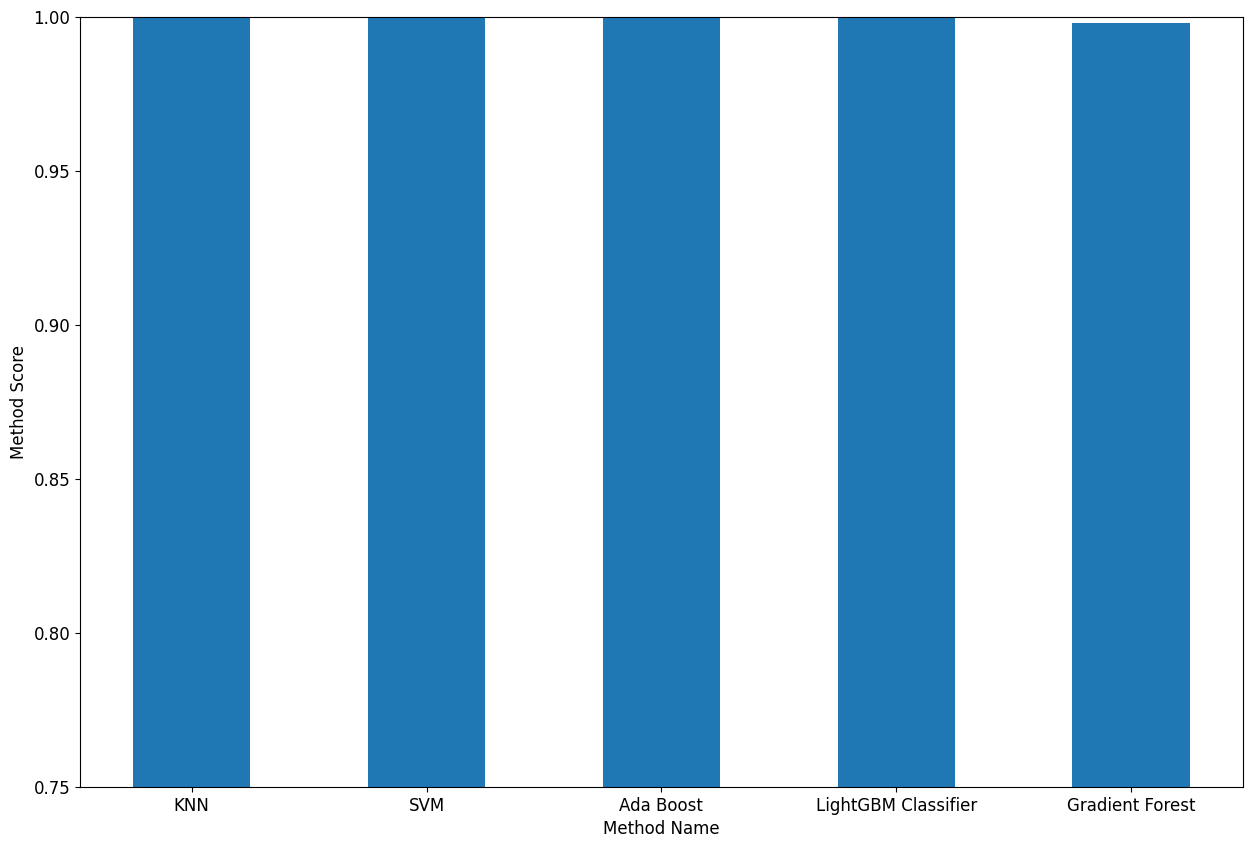

In [45]:
plt.figure(figsize=(15,10)) 
plt.ylim([0.75,1]) 
plt.bar(max_methods,max_scores,width=0.5) 
plt.xlabel('Method Name') 
plt.ylabel('Method Score')

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 300}
Train Score: 0.9784221790431133
Test Score: 0.9759825327510917
Random Forest CV Classification Score:  0.9759825327510917


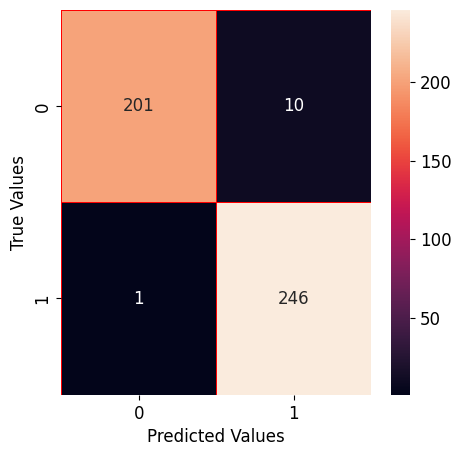

In [46]:
from sklearn.model_selection import GridSearchCV 
grid = { 'criterion':['gini','entropy'], 'n_estimators':np.arange(100,500,100), 'max_depth':[2,3,4] } 
gb = RandomForestClassifier() 
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(x_train,y_train) 
print("Best Parameters:",gb_cv.best_params_) 
print("Train Score:",gb_cv.best_score_) 
print("Test Score:",gb_cv.score(x_test,y_test)) 
print("Random Forest CV Classification Score: ",gb_cv.score(x_test,y_test)) 
method_names.append("Random Forest CV") 
method_scores.append(gb_cv.score(x_test,y_test))
#Confusion Matrix 
y_pred = gb_cv.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix 
f, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

Ada Boost Classification Score:  1.0


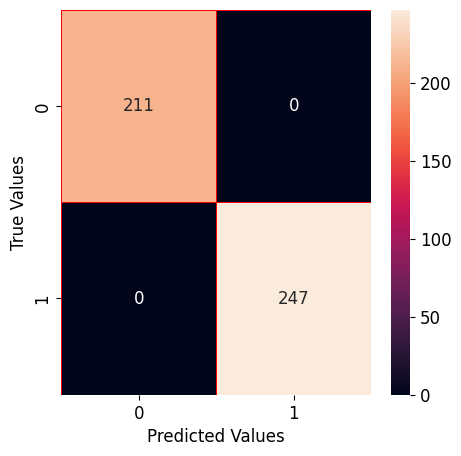

In [47]:
from sklearn.ensemble import AdaBoostClassifier 
clf = AdaBoostClassifier(n_estimators=100, random_state=0) # Fit train data to GBC 
clf.fit(x_train,y_train) 
print("Ada Boost Classification Score: ",clf.score(x_test,y_test)) 
method_names.append("Ada Boost") 
method_scores.append(clf.score(x_test,y_test)) #Confusion Matrix 
y_pred = clf.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix 
f, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()

In [48]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(clf, pickle_out) 
pickle_out.close()

In [49]:
from IPython.display import FileLink 
FileLink(r'classifier.pkl')

/kaggle/working/classifier.pkl

In [50]:
# Save the scaler to a file 
with open('scaler.pkl', 'wb') as f: 
    pickle.dump(scalar, f)

In [51]:
FileLink(r'scaler.pkl')

/kaggle/working/scaler.pkl